# <center>Klasyfikacja użytkowników i botów </center>


<h4><div style="text-align: center;">
    Adrian Siwek, 223296<br>
    Mateusz Pszczółkowski, 223315<br>
    Kamil Pracki, 223510<br>
    Emilia Śliwka, 223624<br>
    Jakub Orchowski, 223281<br>
</div></h4>


<ol>
  <h2><li>Streszczenie</li></h2>
  <p>
  Celem projektu była klasyfikacja kont pochodzących z serwisu vk.com na dwie kategorie: prawdziwi użytkownicy oraz boty. 

Użytymi metodami klasyfikacji to : las losowy (Random Forest), gradient boosting, regresję logistyczną, a także model hybrydowy. Celem było uzyskanie jak najwyższej skuteczności w rozróżnianiu autentycznych użytkowników od kont automatycznych. Klasyfikacja może ujawnić charakterystyczne cechy kont botów, co pozwala lepiej zrozumieć, w jaki sposób różnią się one od prawdziwych użytkowników. Ta wiedza może  zwiększyć świadomość użytkowników i pomóc im samodzielnie rozpoznawać konta generujące treści automatycznie.
  </p>
  <h2><li>Słowa kluczowe</li></h2>
  <ul>
    <li>Użytkownik</li>
    <li>Bot</li>
    <li>Klasyfikacja</li>
    <li>Random forest</li>
    <li>regresja logistyczna</li>
    <li>target</li>
  </ul>
  <h2><li>Wprowadzenie</li></h2>
  <p>
  W ostatnich latach dynamiczny rozwój sztucznej inteligencji oraz narzędzi do automatycznego generowania treści znacząco wpłynął na sposób funkcjonowania mediów społecznościowych. Coraz częściej obserwuje się obecność kont, które nie są zarządzane przez realnych użytkowników, lecz przez algorytmy – tzw. boty. Takie konta mogą służyć m.in. do rozpowszechniania dezinformacji, sztucznego zwiększania zasięgów czy manipulowania opinią publiczną.
W związku z rosnącym znaczeniem tego zjawiska, umiejętność odróżnienia kont rzeczywistych od botów staje się coraz ważniejsza – zarówno z perspektywy indywidualnych użytkowników, jak i badaczy analizujących dane społecznościowe. 
  </p>
  <h2><li>
    Przedmiot badania</h2>
    <ol type="a">
      <h3><li>Cel i zakres badania</h3>
        <p>Celem badania jest przeprowadzenie klasyfikacji kont użytkowników platformy vk.com w celu odróżnienia kont autentycznych od botów. W tym celu zastosowano różne metody uczenia maszynowego: las losowy, gradient boosting, regresję logistyczną oraz model hybrydowy.  Zakres badania obejmuje 5874 konta użytkowników vk.com, których dane zostały pobrane z publicznie dostępnych profili.</p>
      </li>
      <h3><li>Zmienne wybrane do analizy</h3>
        <ol type="I">
        <h4>W celu uproszczenia analizy i zwiększenia przejrzystości, wszystkie zmienne w zbiorze danych zostały nazwane zgodnie z logicznymi schematami nazewnictwa. Dzięki temu użytkownik może z łatwością zrozumieć, czego dotyczy dana zmienna, nawet bez znajomości szczegółów jej zawartości.</h4>
            <h4><li>Zmienne zaczynające się od has_ informują, czy dana informacja została uzupełniona przez użytkownika. </li></h4>
                <h1>To do: Bedzie trzeba zmienic wszystkie booleany tak zeby mialy jednakowy schemat nazewnictwa i tutaj je wszystkie wypisac</h1>               
                <ol>
                  <li>has_domain</li>
                  <li>has_birth_date</li>
                  <li>has_photo</li>
                  <li>has_website</li>
                  <li>has_short_name</li>
                  <li>has_first_name</li>
                  <li>has_last_name</li>
                  <li>has_nickname</li>
                  <li>has_maiden_name</li>
                  <li>has_mobile</li>
                  <li>has_interests</li>
                  <li>has_books</li>
                  <li>has_tv</li>
                  <li>has_quotes</li>
                  <li>has_about</li>
                  <li>has_games</li>
                  <li>has_movies</li>
                  <li>has_activities</li>
                  <li>has_music</li>
                  <li>has_career</li>
                  <li>has_military_service</li>
                  <li>has_hometown</li>
                  <li>has_universities</li>
                  <li>has_schools</li>
                  <li>has_relatives</li>
                  <li>has_status</li>
                  <li>has_occupation</li>
                  <li>has_personal_data</li>
                </ol> 
             <h4><li>Zmienne zaczynające się od  is_, określają status profilu użytkownika</li></h4>
             <ol>
                  <li>is_profile_closed</li>
                  <li>is_blacklisted</li>
                  <li>is_verified</li>
                  <li>is_confirmed</li>
            </ol>    
             <h4><li>Zmienne zaczynające się od  can_, wskazują na możlwości interakcji z innymi użytkownikami</li></h4>    
             <ol>
                  <li>can_post_on_wall</li>
                  <li>can_send_message</li>
                  <li>can_add_as_friend</li>
                  <li>can_invite_to_group</li>
            </ol>
             <h4><li>Zmienne ilościowe dotyczące aktywności profilu </li></h4>    
             <ol>
              <li>posts_count</li>
              <li>avg_likes</li>
              <li>links_ratio</li>
              <li>hashtags_ratio</li>
              <li>avg_keywords</li>
              <li>avg_text_length</li>
              <li>attachments_ratio</li>
              <li>avg_comments</li>
              <li>reposts_ratio</li>
              <li>ads_ratio</li>
              <li>avg_views</li>
              <li>posting_frequency_days</li>
              <li>phone_numbers_ratio</li>
              <li>avg_text_uniqueness</li>
            </ol>
             <h4><li>Pozostałe zmienne typu boolean</li></h4>
             <ol>
              <li>access_to_closed_profile</li>
              <li>all_posts_visible</li>
              <li>audio_available</li>
              <li>occupation_type_university</li>
              <li>occupation_type_work</li>
            </ol>    
             <h4><li>Pozostałe zmienne ogólne</li></h4>    
             <ol>
              <li>gender</li>
              <li>marital_status</li>
              <li>subscribers_count</li>
              <li>city</li>
            </ol>
            <h4><li>Target</li></h4>
                <ul>
                    Zmienna target pełni rolę etykiety klas w zadaniu klasyfikacyjnym. Przyjmuje dwie wartości:<br>
                    0 – oznacza konto prawdziwego użytkownika (autentyczne), <br>
                    1 – oznacza konto bota (automatyczne).
                </ul>        
        </ol>
      </li>
    </ol>
  </li>
</ol>



<center>Wyświetlenie zawartości pliku z danymi</center>

In [46]:
import pandas as pd

df = pd.read_csv('bots_vs_users.csv')
df.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


<center>Informacje o zbiorze danych</center>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

Policzenie nulli i 'Unknown' w zbiorze

In [48]:
pd.DataFrame({
    'Null': df.isna().sum(),
    'Unknown': (df == 'Unknown').sum(),
    'Procent pustych/nieznanych danych': (df.isna().sum() + (df == 'Unknown').sum()) / df.shape[0] * 100
})

,Null,Unknown,Procent pustych/nieznanych danych
has_domain,0,24,0.408580
has_birth_date,0,856,14.572693
has_photo,0,24,0.408580
can_post_on_wall,0,24,0.408580
can_send_message,0,24,0.408580
has_website,0,742,12.631937
gender,0,24,0.408580
has_short_name,0,24,0.408580
has_first_name,0,24,0.408580
has_last_name,0,24,0.408580


Czyszczenie danych (usunięcie kolumn z brakującymi danymi i zastąpienie wartości 'Unknown' i 'NaN' przez -1)

In [49]:
df.dropna(axis=1, how='all', inplace=True)
df.fillna(-1, inplace=True)
df.replace('Unknown', -1, inplace=True)

Konwersja zmiennej city na typ boolean - od tej pory -1 symbolizuje brak miasta a 1 miasto. Zmieniam również nazwę kolumny na bardziej adekwatną

In [50]:
df['city'] = df['city'].apply(lambda x: 1 if x != -1 else -1)
df = df.rename(columns={'city': 'has_city'})

Zamiana zmiennych nienumerycznych na numeryczne

In [51]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Informacje o zbiorze po czyszczeniu

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   float64
 1   has_birth_date              5874 non-null   float64
 2   has_photo                   5874 non-null   float64
 3   can_post_on_wall            5874 non-null   float64
 4   can_send_message            5874 non-null   float64
 5   has_website                 5874 non-null   float64
 6   gender                      5874 non-null   float64
 7   has_short_name              5874 non-null   float64
 8   has_first_name              5874 non-null   float64
 9   has_last_name               5874 non-null   float64
 10  access_to_closed_profile    5874 non-null   float64
 11  is_profile_closed           5874 non-null   float64
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

<ol>
    <ol type="a" start = "3">
        <h3><li>statystyki opisowe </li></h3>
                    <ul>
                        <li>Średnia: Wartość, która informuje nas o przeciętnym poziomie danej zmiennej w zbiorze danych. Przykładowo średnią cenę za metr kwadratowy w Warszawie, która daje punkt odniesienie przy wyborze mieszkania </li>
                        <li>Mediana: Wartość środkowa w uporządkowanym zbiorze danych, która dzieli dane na dwie równe części. Jest lepszym wyborem niż średnia, gdy dane mogą być zniekształcone przez wartości skrajne. Przykładowo średnia ceny może być zniekształcona przez bardzo duże mieszkania </li>
                        <li>Minimum: Najniższa wartość w zbiorze danych </li>
                        <li>Maksimum: Najwyższa wartość w zbiorze danych</li>
                        <li>Odchylenie standardowe: Miara rozproszenia danych wokół średniej. Może ona pokazać czy na przykład ceny za metr kwadratowy w mieście są zróżnicowane czy zbliżone do siebie. </li>
                        <li>Skośność: Mierzy asymetrię rozkładu danych, wskazując, czy dane są bardziej skupione po jednej stronie średniej. Przykładowo pokazuje czy powierzchnia większości mieszkań jest większa czy mniejsza od średniej. </li>
                    </ul>
    </ol>
</ol

<h4>Statystyki dla danych numerycznych<h4>

In [53]:
df_num = df[[col for col in df.columns if df[col].nunique()> 10]]

pd.DataFrame({
    'Count': df_num.count(),
    'Mean': df_num.mean(),
    'Median': df_num.median(),
    'Min': df_num.min(),
    'Max': df_num.max(),
    'Std': df_num.std(),
    'Skew': df_num.skew()
})

,Count,Mean,Median,Min,Max,Std,Skew
subscribers_count,5874,765.606401,-1.0,-1.0,103729.00,2545.336504,15.361513
posts_count,5874,3.648281,-1.0,-1.0,20.00,8.595666,1.346417
avg_likes,5874,3.866958,-1.0,-1.0,894.90,22.202575,20.413907
links_ratio,5874,-0.726142,-1.0,-1.0,1.00,0.501474,1.397568
hashtags_ratio,5874,-0.729113,-1.0,-1.0,1.00,0.494790,1.378204
avg_keywords,5874,1.067475,-1.0,-1.0,61.60,6.624632,4.992843
avg_text_length,5874,128.237501,-1.0,-1.0,5841.25,431.056682,5.165787
attachments_ratio,5874,-0.551028,-1.0,-1.0,1.00,0.810313,1.269264
avg_comments,5874,-0.618550,-1.0,-1.0,64.05,1.379595,22.496507
reposts_ratio,5874,-0.660506,-1.0,-1.0,1.00,0.639513,1.561622


<h4>Statystyki dla danych binarnych/kategorycznych<h4>

In [54]:
df_bin = df[[col for col in df.columns if df[col].nunique()< 10]]

pd.DataFrame({
    'Count': df_bin.count(),
    'Mean': df_bin.mean(),
    'Median': df_bin.median(),
    '0 precent': [round(len(df[df_bin[col] == 0])/df.shape[0] *100,2) for col in df_bin.columns],
    '1 percent': [round(len(df[df_bin[col] == 1])/df.shape[0] *100,2) for col in df_bin.columns],
    '-1 percent': [round(len(df[df_bin[col] == -1])/df.shape[0] *100,2) for col in df_bin.columns]
})

,Count,Mean,Median,0 precent,1 percent,-1 percent
has_domain,5874,0.991828,1.0,0.00,99.59,0.41
has_birth_date,5874,0.708546,1.0,0.00,85.43,14.57
has_photo,5874,0.546136,1.0,44.57,55.02,0.41
can_post_on_wall,5874,0.034559,0.0,95.73,3.86,0.41
can_send_message,5874,0.438713,0.0,55.31,44.28,0.41
has_website,5874,-0.007831,0.0,75.52,11.85,12.63
gender,5874,1.208716,1.0,0.54,76.81,0.41
has_short_name,5874,0.991828,1.0,0.00,99.59,0.41
has_first_name,5874,0.991828,1.0,0.00,99.59,0.41
has_last_name,5874,0.990807,1.0,0.10,99.49,0.41


<ol>
    <ol type="a" start = "5">
                <h4><li>Podstawowa wizualizacja: </h4></li>
    </ol>
</ol
<p>Mapa korelacji zmiennych. Czym większa liczba tym silniejszy związek z tym, że dany użytkownik jest człowiekiem a czym mniejsza tym silniejszy związek z tym, że dany użytkownik jest botem.</p>

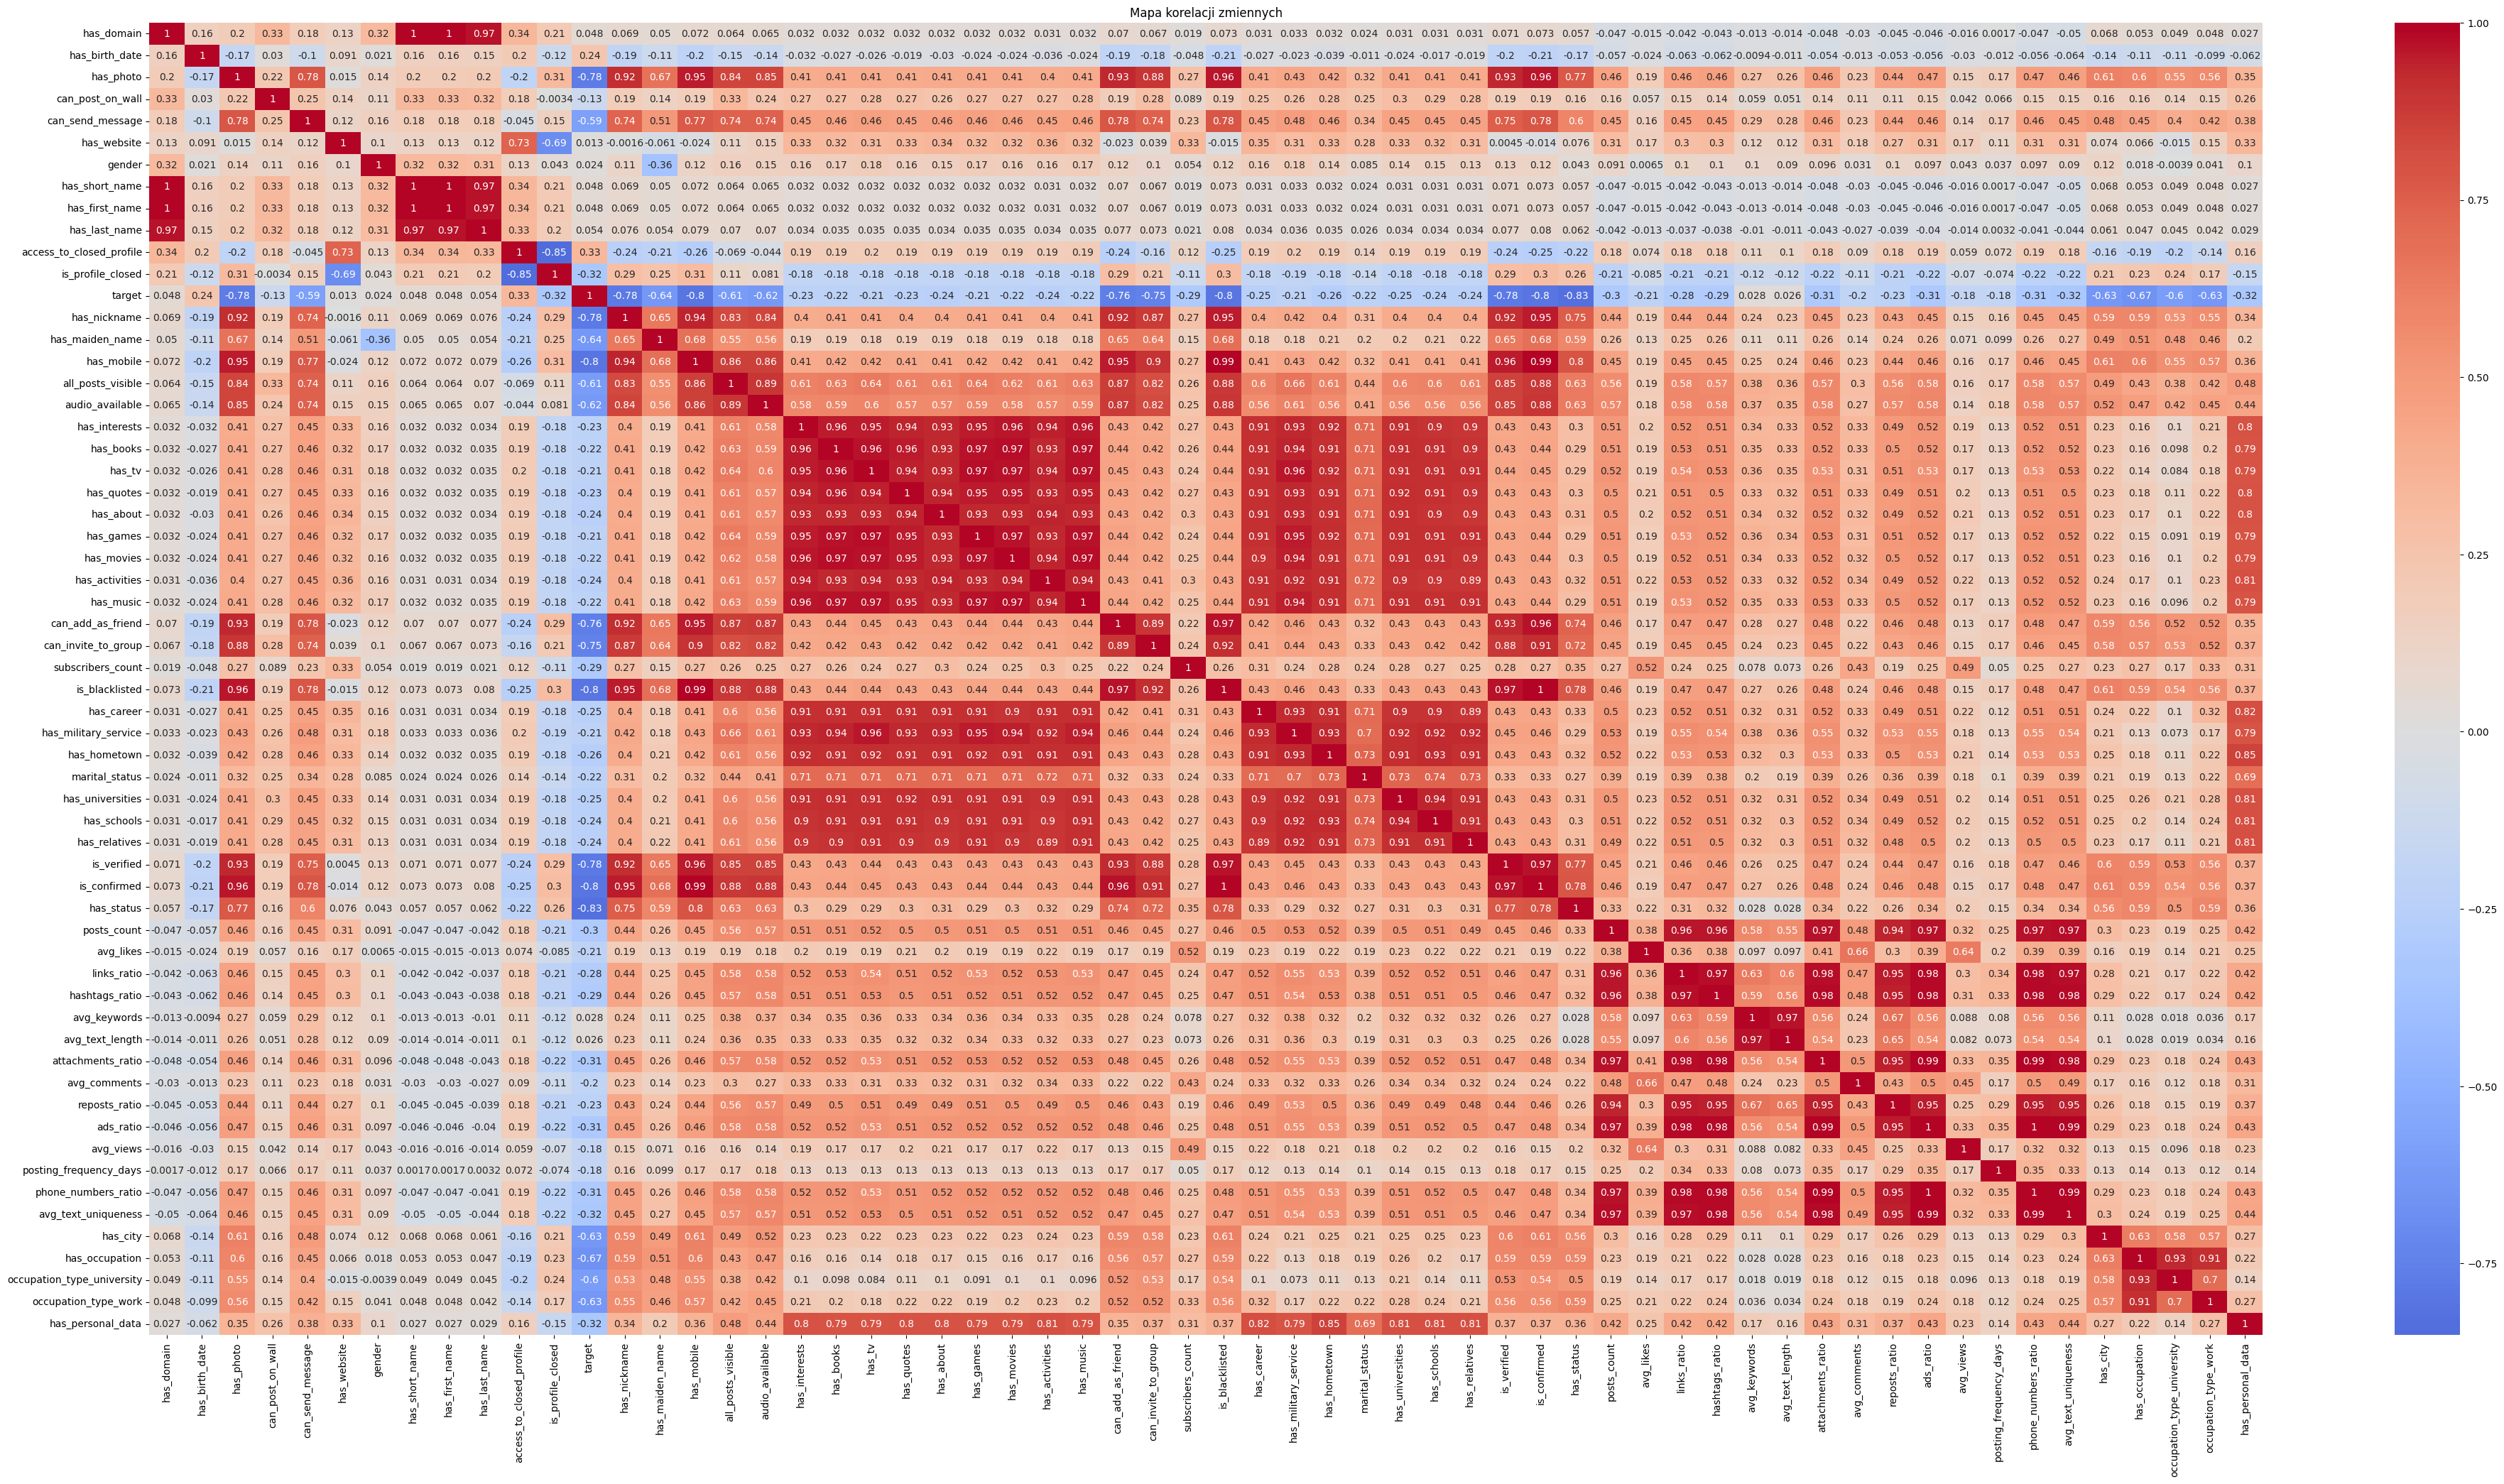

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()
plt.figure(figsize=(48, 24))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa korelacji zmiennych')
plt.show()

Związek ze zmienną target

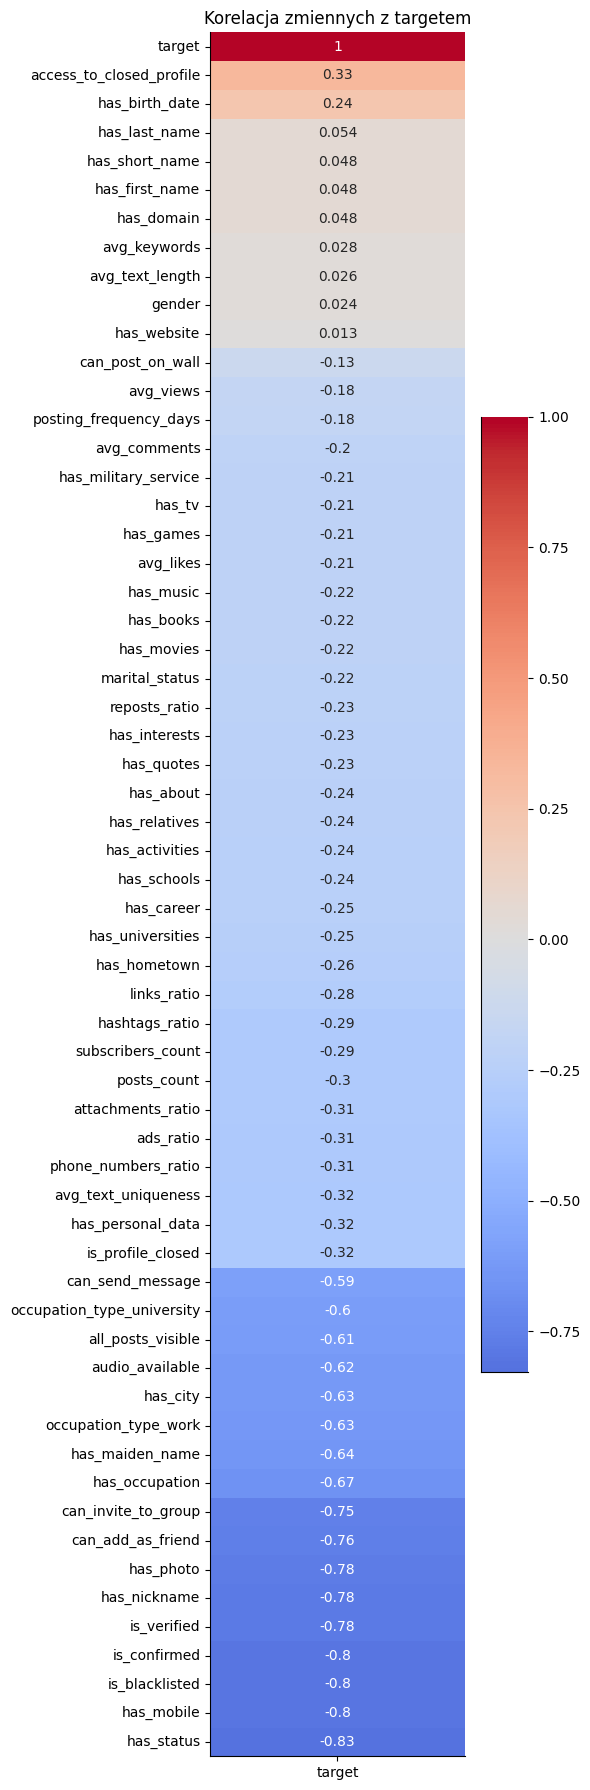

In [56]:
target_corr = correlation[['target']].sort_values(by='target', ascending=False)

plt.figure(figsize=(6, len(target_corr) * 0.3))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.title("Korelacja zmiennych z targetem")
plt.tight_layout()

<h4>Przygotowanie danych do modelu<h4>

<h4>Wybór cech</h4>
<p>W zbiorze danych znajduje się 60 kolumn, jednocześnie duża część z nich to dane kategoryczne. 
Żeby zmniejszyć czas nauki modelu klasyfikacji i być może zwiększyć zdolność modelu do uogólniania, 
wydobędziemy tylko te kolumny które mają największy wpływ na zmienną target.</p>

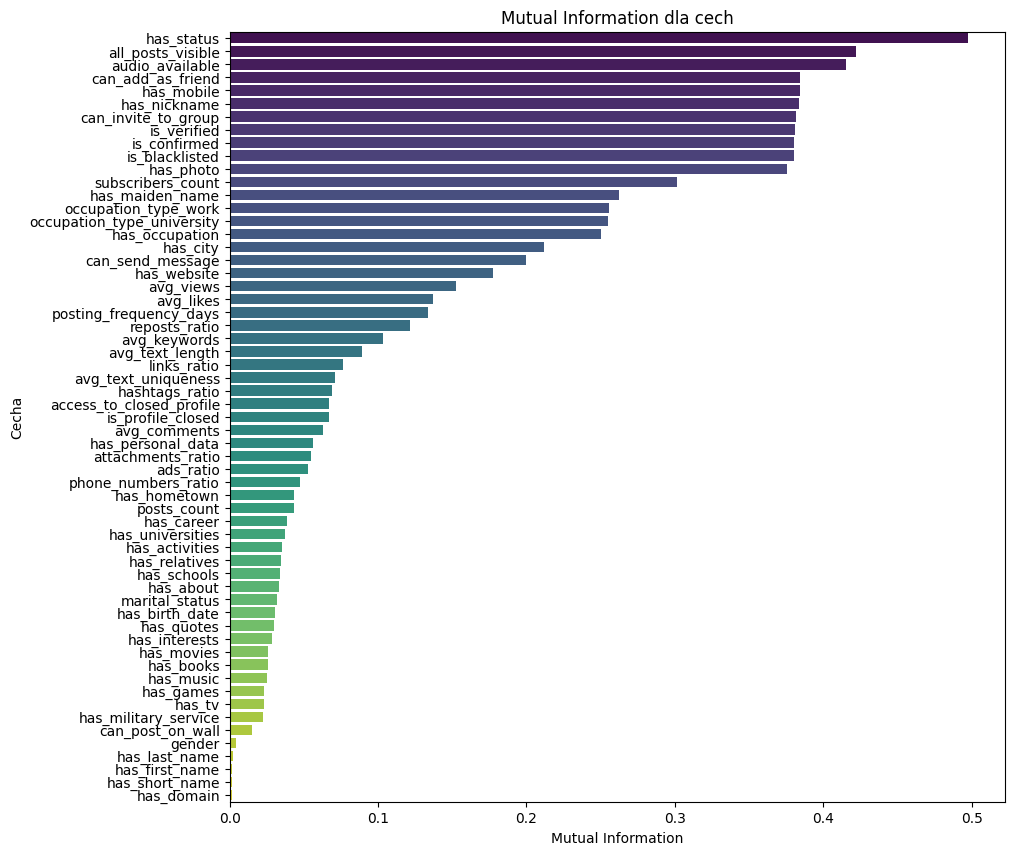

In [57]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.drop(columns=['target'])
y = df['target']

discrete_mask = [
    True if (X[col].nunique() < 10 and col not in ["ads_ratio", "phone_numbers_ratio"]) else False
    for col in X.columns
]

mi = mutual_info_classif(X, y, discrete_features=discrete_mask)
mi_series = pd.Series(mi, index=X.columns)
mi_sorted = mi_series.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=mi_sorted.values, y=mi_sorted.index, orient='h', hue=mi_sorted.index, palette='viridis')
plt.title("Mutual Information dla cech")
plt.xlabel("Mutual Information")
plt.ylabel("Cecha")
plt.show()

In [58]:

selector = SelectKBest(mutual_info_classif, k =15)
X_new = selector.fit_transform(X,y)
selected_columns = X.columns[selector.get_support()]
X_new= pd.DataFrame(X_new, columns=selected_columns, index=X.index)

print("Wybrane kolumny:", selected_columns.values)

Wybrane kolumny: ['has_photo' 'has_nickname' 'has_maiden_name' 'has_mobile'
 'all_posts_visible' 'audio_available' 'can_add_as_friend'
 'can_invite_to_group' 'subscribers_count' 'is_blacklisted' 'is_verified'
 'is_confirmed' 'has_status' 'occupation_type_university'
 'occupation_type_work']


<h4> Wizualizacja zależności międzu wybranymi kolumnami a targetem <h4> 

In [59]:
from sklearn.model_selection import train_test_split

#70% danych jako zbiór treningowy, 30% zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=420)

Skalowanie danych

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Stworzenie modeli

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(max_depth=10,min_samples_leaf=5,random_state=420)
gb_model = GradientBoostingClassifier(max_depth=10,min_samples_leaf=5,random_state=420)
lr_model = LogisticRegression(random_state=420)

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=420)

Stworzenie modelu hybrydowego

In [62]:
from sklearn.base import BaseEstimator
import numpy as np

class HybridClassifier(BaseEstimator):
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], 2))
        for model, weight in zip(self.models, self.weights):
            probas += weight * model.predict_proba(X)
        probas /= np.sum(self.weights)
        return probas
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas[:, 1] > 0.5).astype(int)
    
hybrid_model = HybridClassifier(
    models=[rf_model, gb_model, lr_model],
    weights=[0.4, 0.4, 0.2]
)

Mierzenie skuteczności modeli

In [63]:
models = {
    'Las Losowy': rf_model.predict(X_test_scaled),
    'Gradient Boosting': gb_model.predict(X_test_scaled),
    'Regresja Logistyczna': lr_model.predict(X_test_scaled),
    'Hybryda': hybrid_model.predict(X_test_scaled)
}

for name, predictions in models.items():
    print(f"\n{name}:")
    print(f"Dokładność: {accuracy_score(y_test, predictions):.4f}")
    print("Raport:")
    print(classification_report(y_test, predictions))


Las Losowy:
Dokładność: 0.9682
Raport:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       878
           1       0.96      0.97      0.97       885

    accuracy                           0.97      1763
   macro avg       0.97      0.97      0.97      1763
weighted avg       0.97      0.97      0.97      1763


Gradient Boosting:
Dokładność: 0.9654
Raport:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       878
           1       0.96      0.97      0.97       885

    accuracy                           0.97      1763
   macro avg       0.97      0.97      0.97      1763
weighted avg       0.97      0.97      0.97      1763


Regresja Logistyczna:
Dokładność: 0.9603
Raport:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       878
           1       0.95      0.97      0.96       885

    accuracy                           0.96  

Wizualizacja dokładności modeli

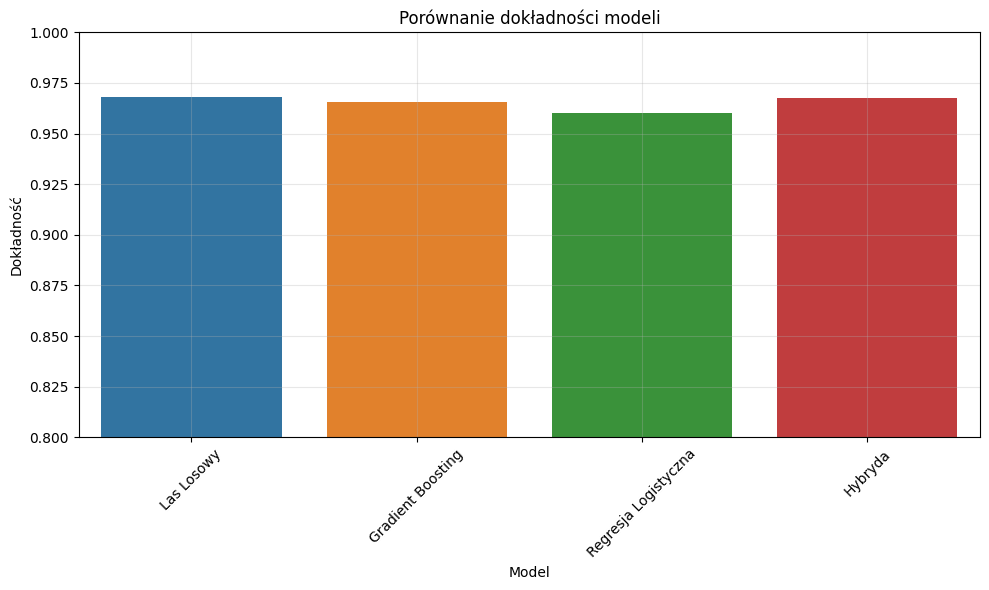

In [64]:
accuracies = {name: accuracy_score(y_test, pred) for name, pred in models.items()}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Dokładność'])

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Dokładność', hue='Model', legend=False)
plt.title('Porównanie dokładności modeli')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Walidacja krzyżowa (bazowych modeli)

In [65]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=420)
cv_scores = {}

for name, model in {
    'Las Losowy': rf_model,
    'Gradient Boosting': gb_model,
    'Regresja Logistyczna': lr_model,
    'Hybryda': hybrid_model
}.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    cv_scores[name] = scores
    print(f"\n{name} - Walidacja krzyżowa:")
    print(f"Średnia dokładność: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"Wyniki poszczególnych foldów: {scores}")


Las Losowy - Walidacja krzyżowa:
Średnia dokładność: 0.9633 (+/- 0.0103)
Wyniki poszczególnych foldów: [0.95625759 0.96472019 0.96107056 0.9622871  0.97201946]

Gradient Boosting - Walidacja krzyżowa:
Średnia dokładność: 0.9638 (+/- 0.0101)
Wyniki poszczególnych foldów: [0.95625759 0.96472019 0.96836983 0.95985401 0.96958637]

Regresja Logistyczna - Walidacja krzyżowa:
Średnia dokładność: 0.9552 (+/- 0.0079)
Wyniki poszczególnych foldów: [0.94896719 0.95742092 0.95255474 0.95742092 0.95985401]

Hybryda - Walidacja krzyżowa:
Średnia dokładność: 0.9625 (+/- 0.0108)
Wyniki poszczególnych foldów: [0.95625759 0.96350365 0.95863747 0.9622871  0.97201946]


Wizualizacja wyników walidacji krzyżowej

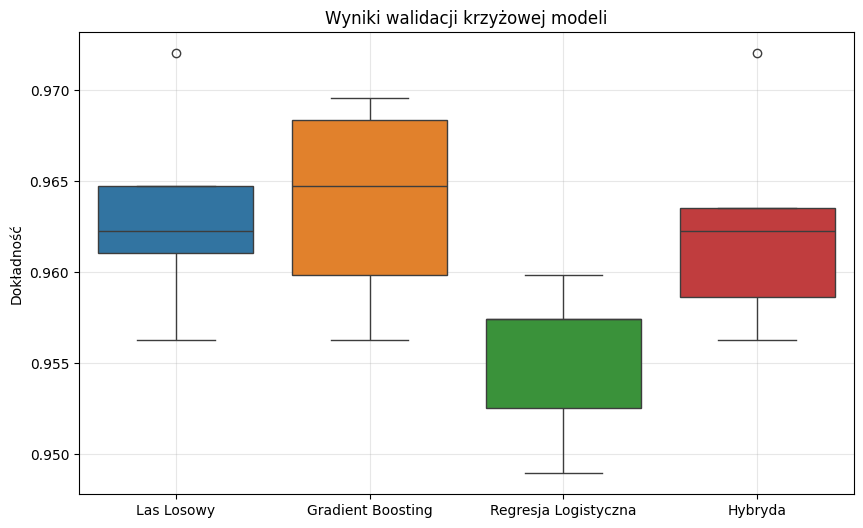

In [66]:
cv_results = pd.DataFrame(cv_scores)
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_results)
plt.title('Wyniki walidacji krzyżowej modeli')
plt.ylabel('Dokładność')
plt.grid(True, alpha=0.3)
plt.show()

#ważność cech dla kazdego z modeli 

Obliczenie ważności cech dla modelu hybrydowego

In [67]:
feature_matrix = []
for i, model in enumerate(hybrid_model.models):
    if hasattr(model, 'feature_importances_'):
        imp = model.feature_importances_
    else:
        imp = np.abs(model.coef_[0])  # dla regresji logistycznej

    weighted_imp = hybrid_model.weights[i] * imp
    feature_matrix.append(weighted_imp)
    
hybrid_importance = np.sum(feature_matrix, axis=0)

In [68]:
f_names = selected_columns

f_importances = {
    "Las Losowy": rf_model.feature_importances_,
    "Gradient Boosting": gb_model.feature_importances_,
    "Regresja Logistyczna": np.abs(lr_model.coef_[0]), 
    "Hybryda": hybrid_importance            
}

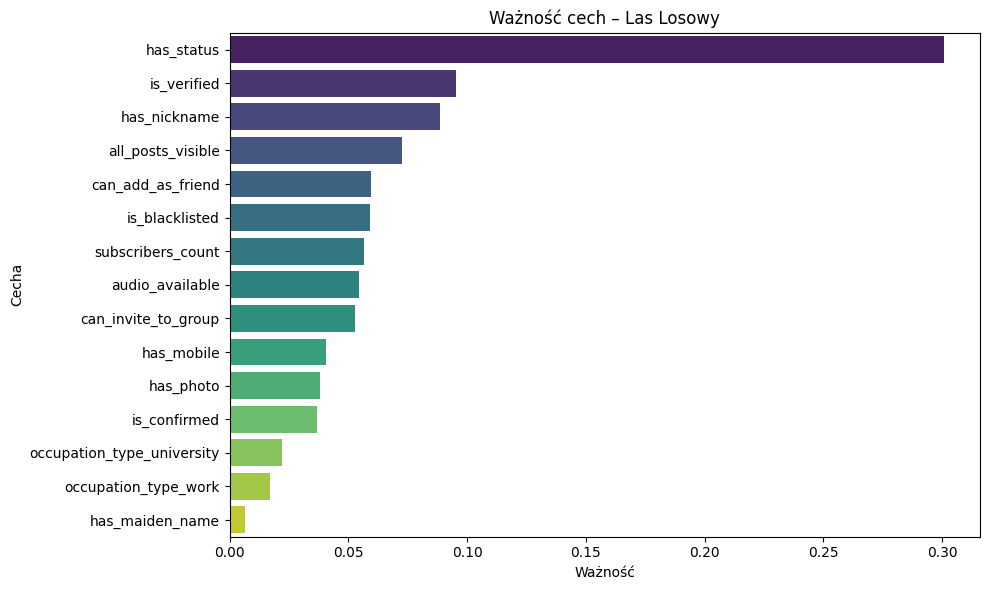

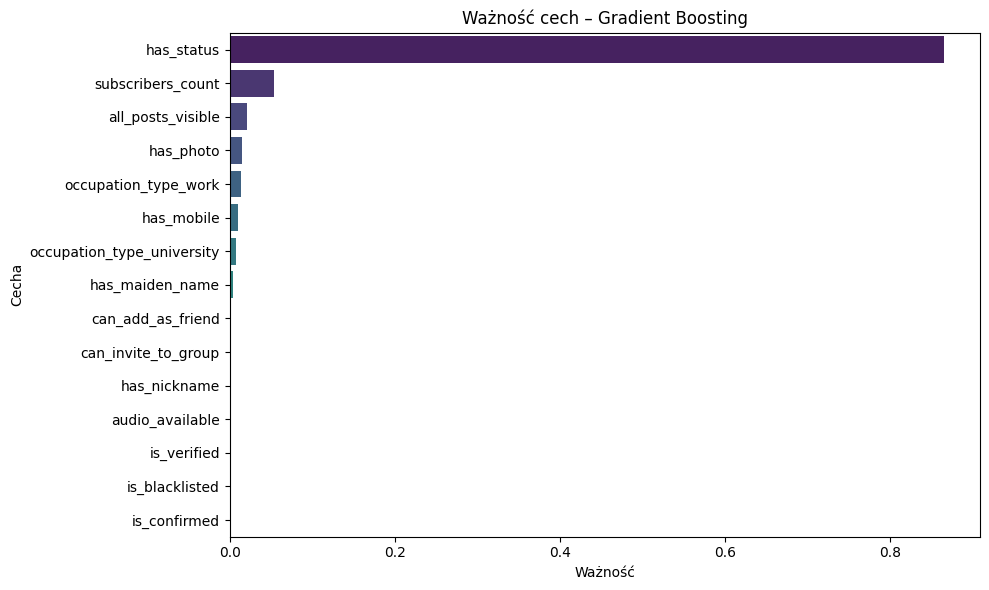

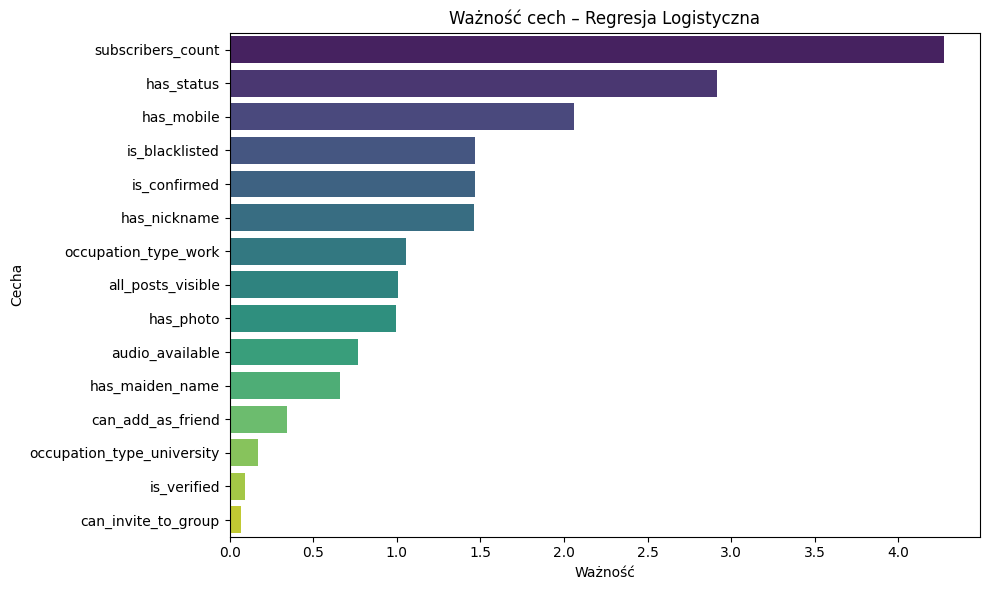

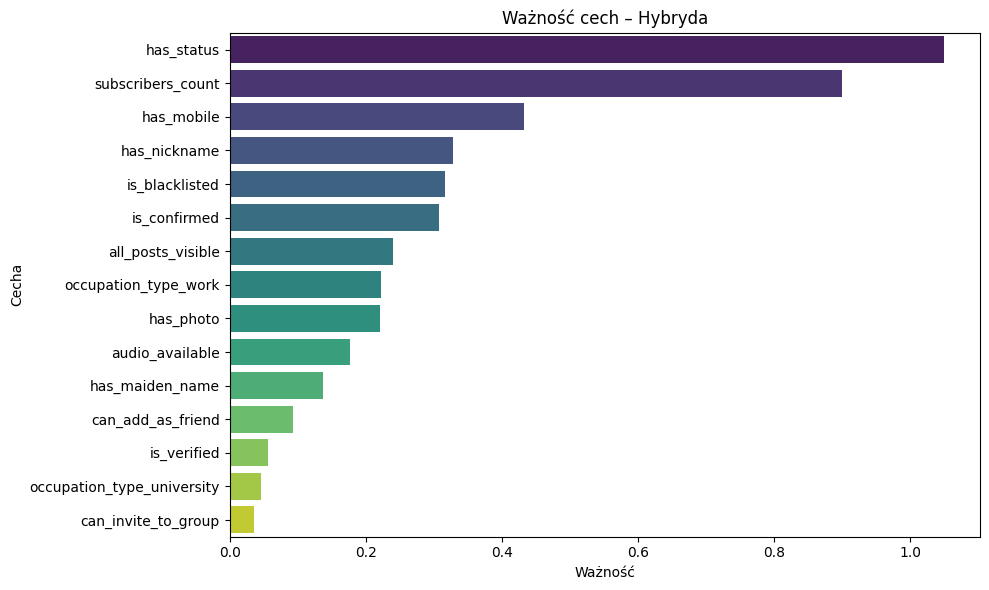

In [69]:
for model_name, importances in f_importances.items():
    importance_df = pd.DataFrame({
        'feature': f_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
    plt.title(f"Ważność cech – {model_name}")
    plt.xlabel("Ważność")
    plt.ylabel("Cecha")
    plt.tight_layout()
    plt.show()

Najlepsze drzewo to nr 61 z błędem 0.0077


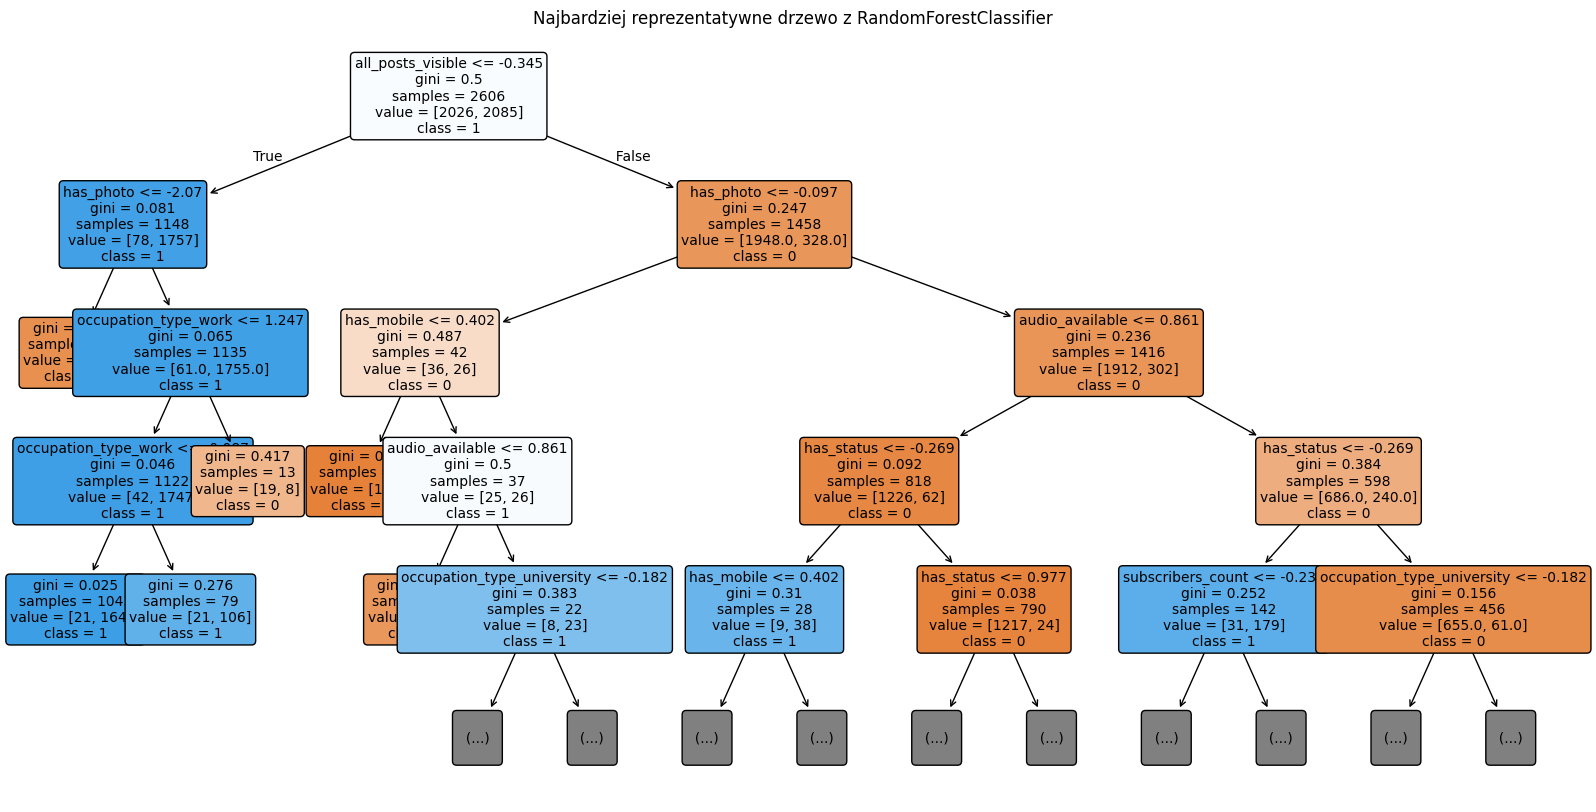

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

forest_preds = rf_model.predict(X_new)

#błąd każdego drzewa względem lasu
errors = []
for est in rf_model.estimators_:
    tree_preds = est.predict(X_new)
    error = np.mean(tree_preds != forest_preds)  #accuracy error
    errors.append(error)

#bierzemy drzewo z  najmniejszym błędem względem predykcji całego lasu
best_tree_idx = np.argmin(errors)
best_tree = rf_model.estimators_[best_tree_idx]

print(f"Najlepsze drzewo to nr {best_tree_idx} z błędem {errors[best_tree_idx]:.4f}")

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=X_new.columns,
    class_names=[str(cls) for cls in rf_model.classes_],
    filled=True,
    rounded=True,
    max_depth=4,
    fontsize=10
)
plt.title("Najbardziej reprezentatywne drzewo z RandomForestClassifier")
plt.show()